In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from numpy import unique
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv('CC GENERAL.csv',index_col='CUST_ID')
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [3]:
data=data.dropna(axis=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CRED

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(8636, 17)

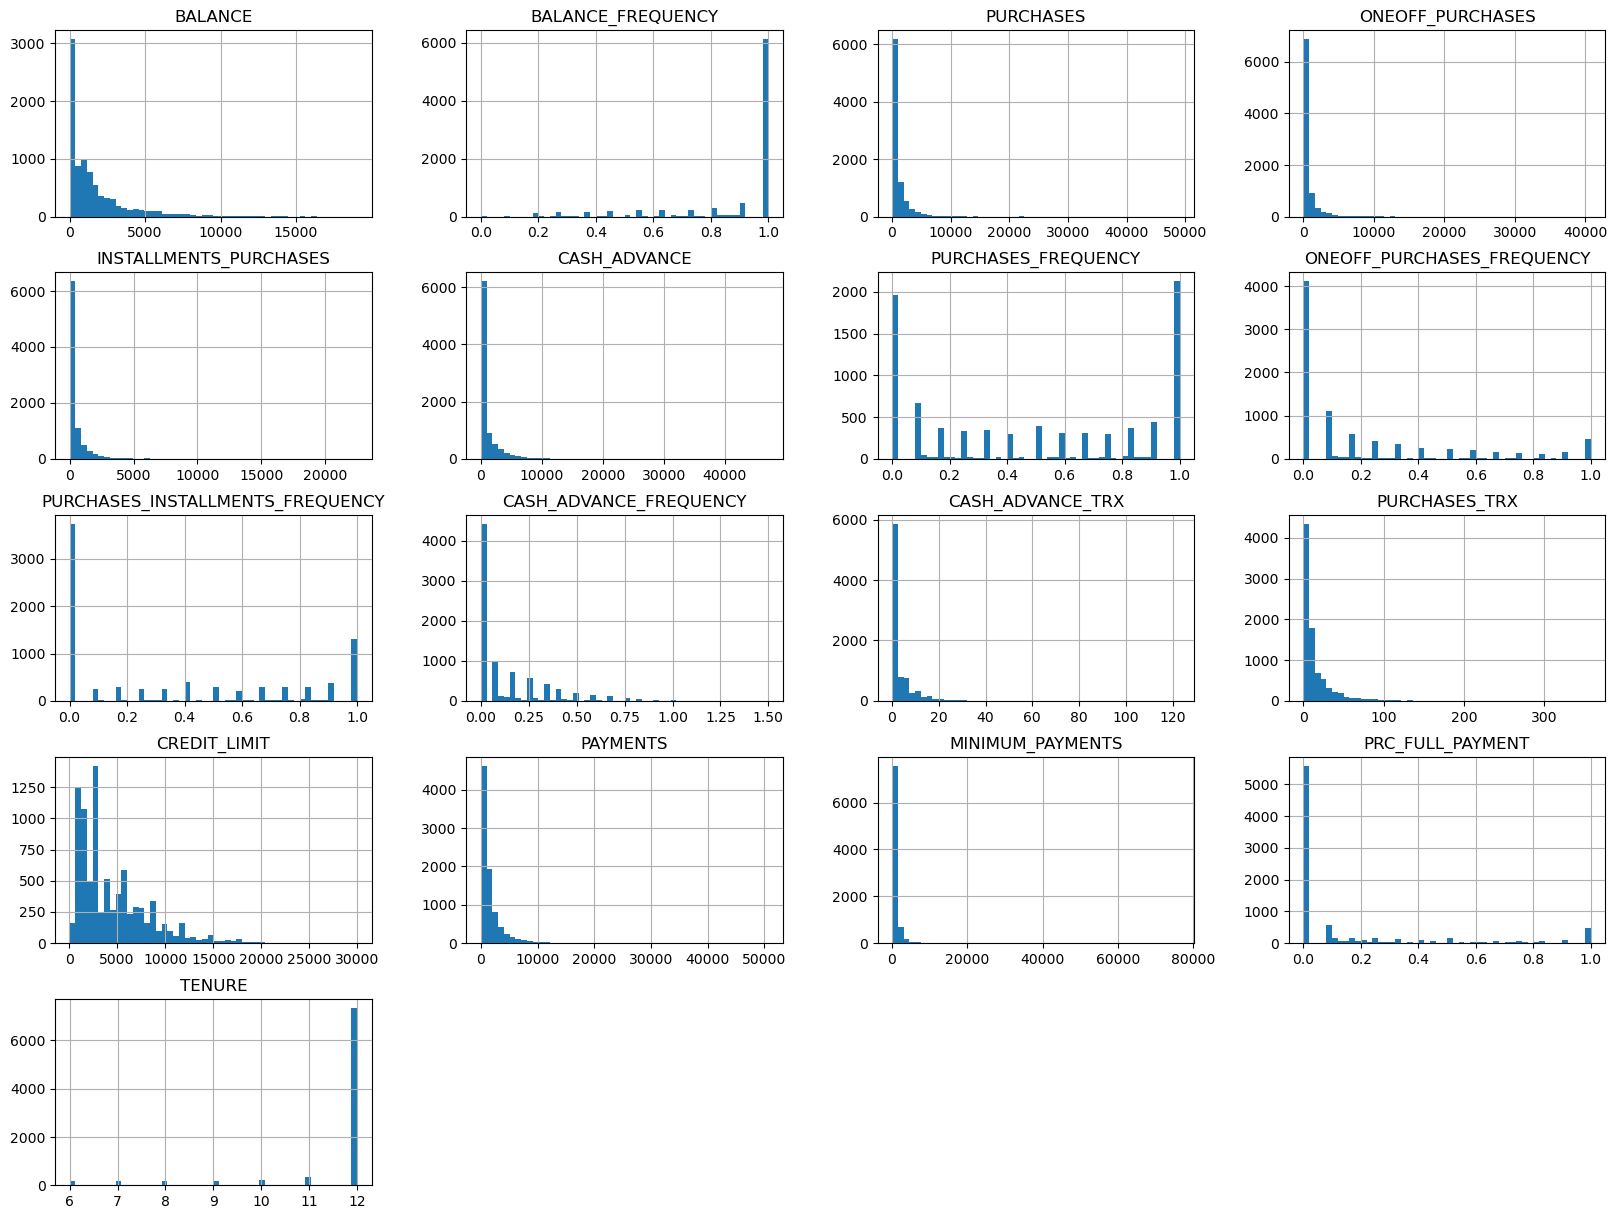

In [9]:
data.hist(figsize=(20,15),bins=50)
plt.show()

Text(0, 0.5, 'purchases')

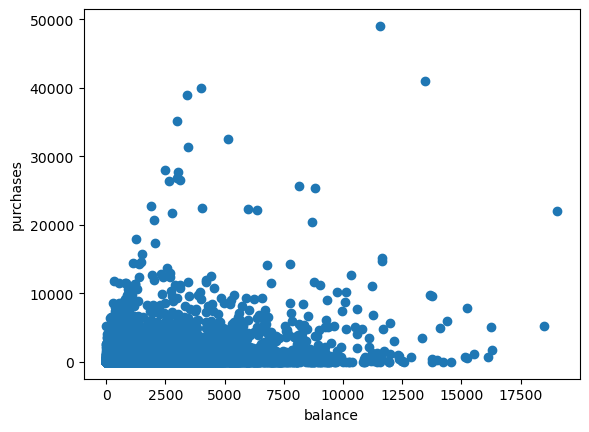

In [6]:
plt.scatter(data['BALANCE'],data['PURCHASES'])
plt.xlabel('balance')
plt.ylabel('purchases')


C:\Users\Elnour Tech\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


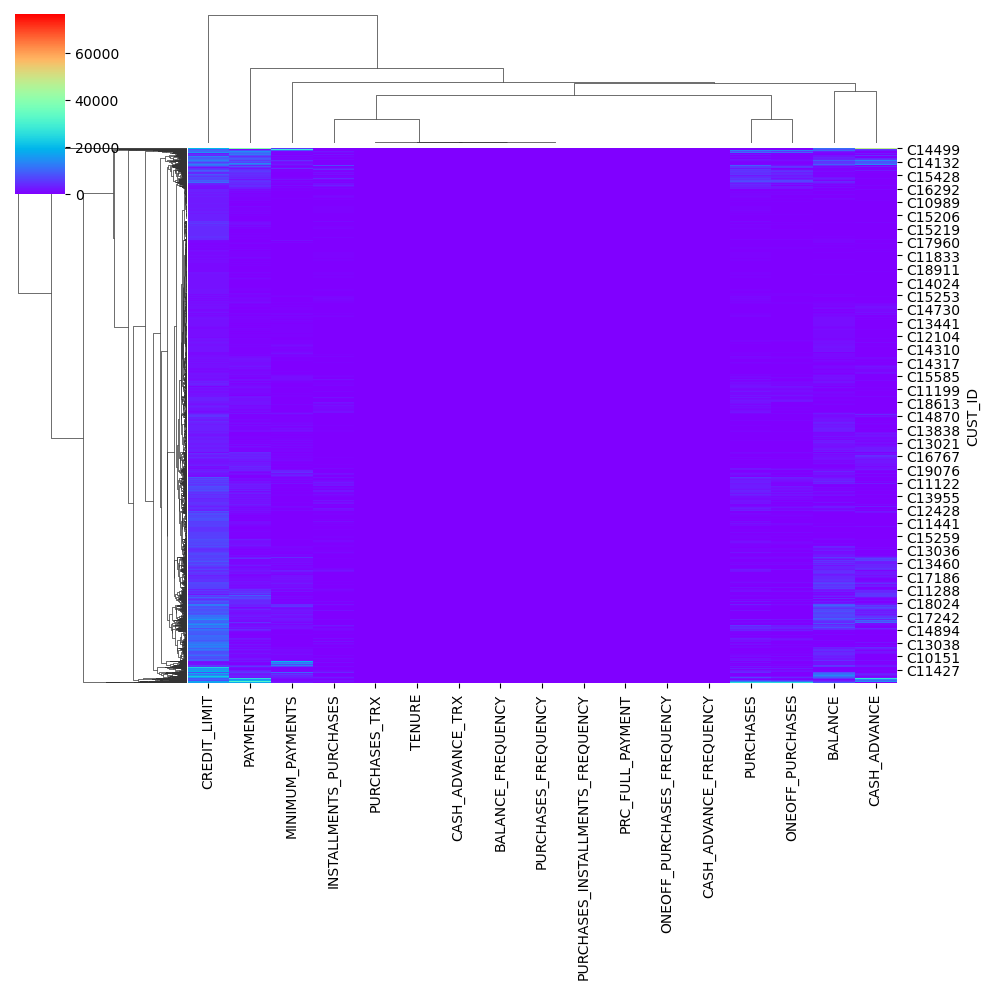

In [11]:
sns.clustermap(data,cmap='rainbow')

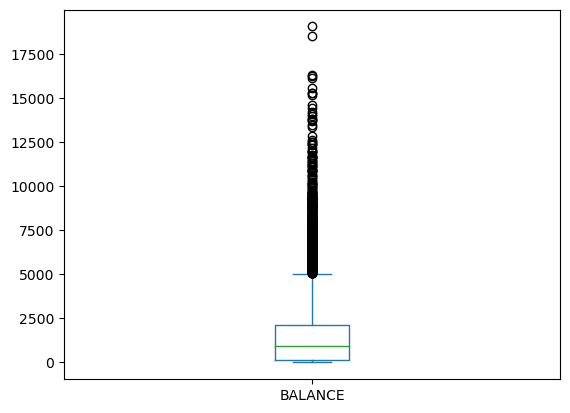

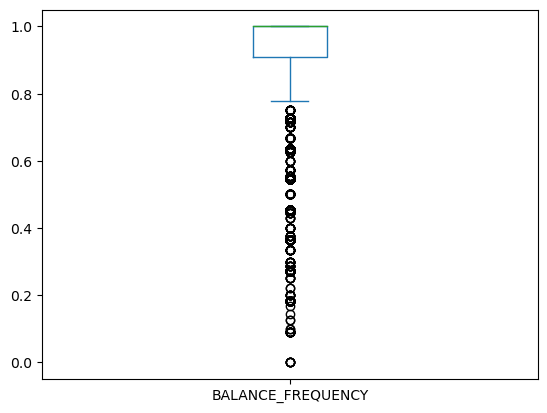

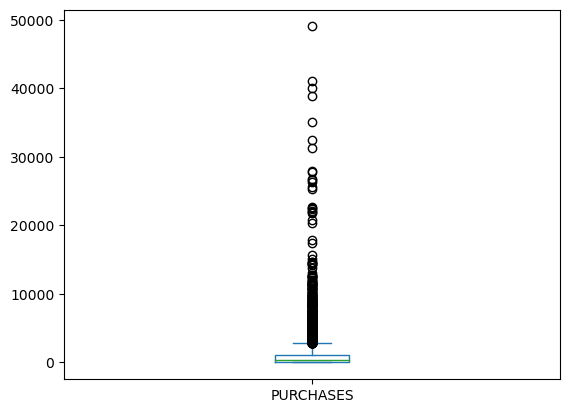

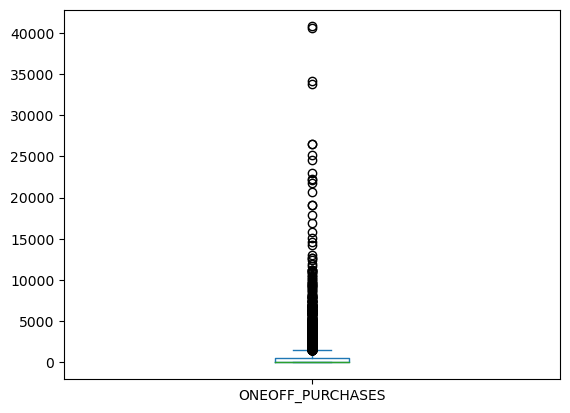

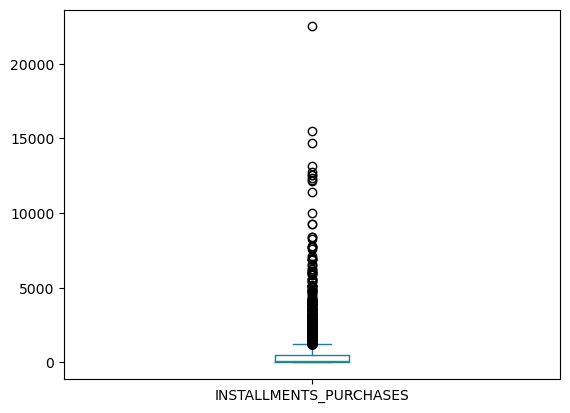

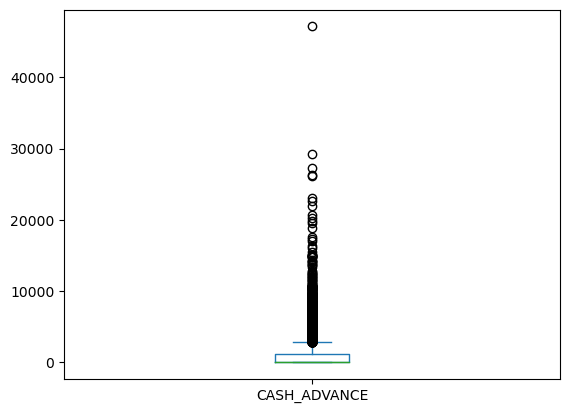

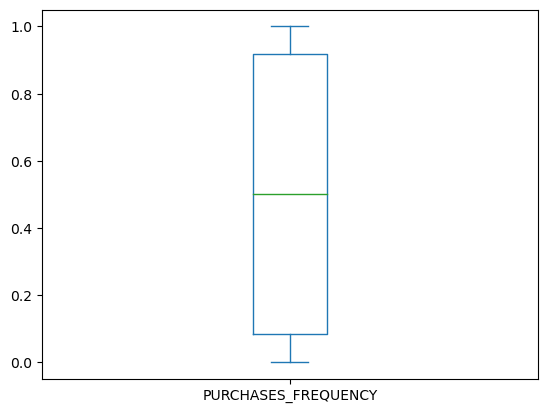

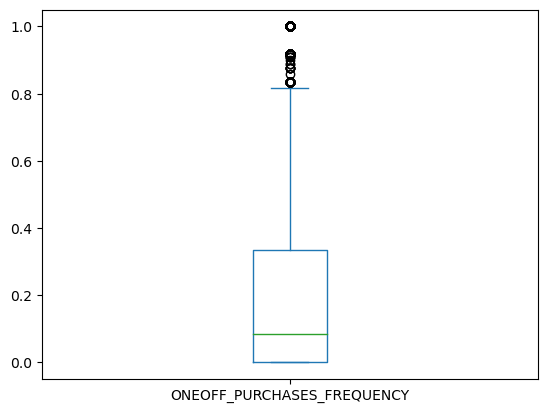

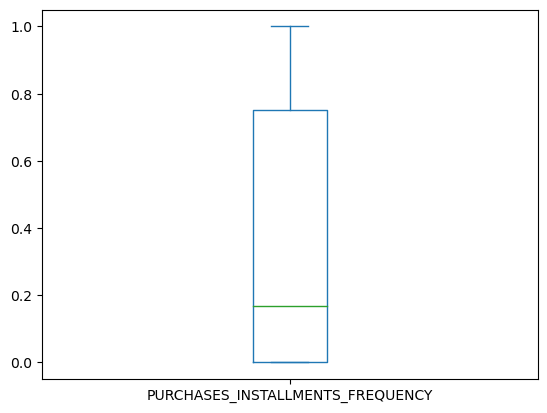

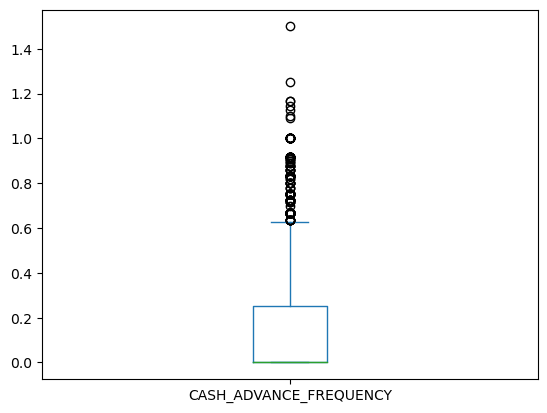

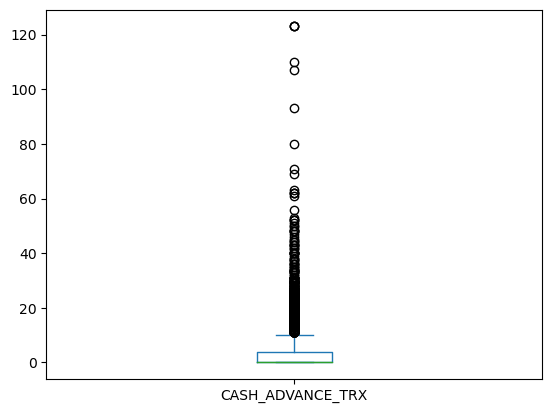

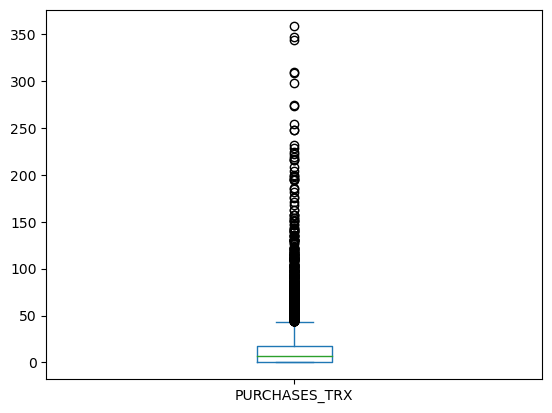

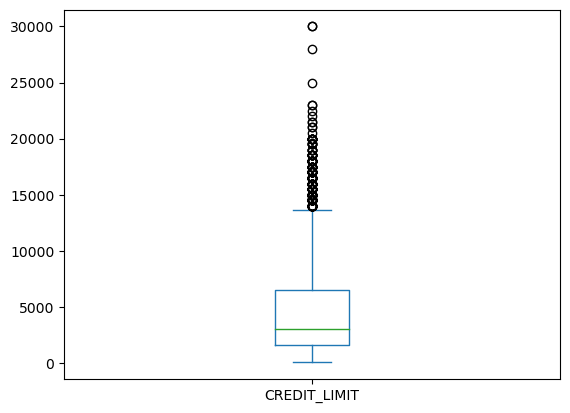

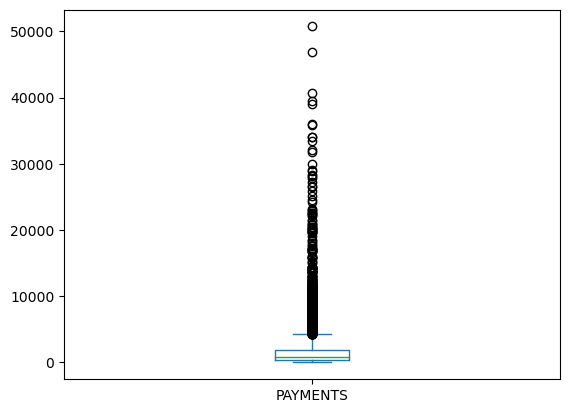

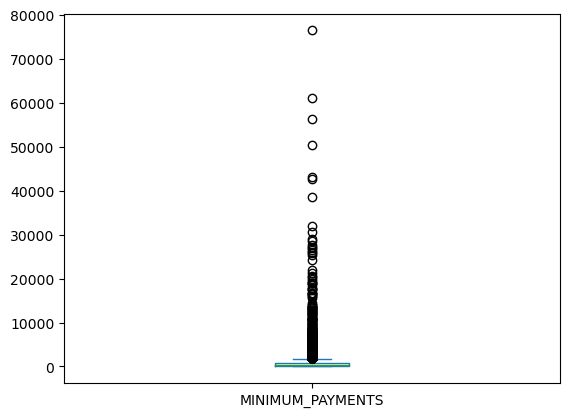

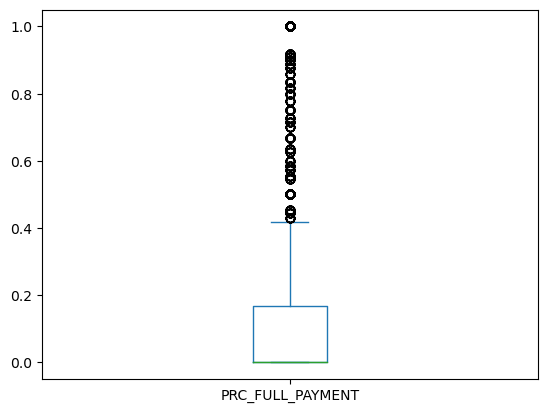

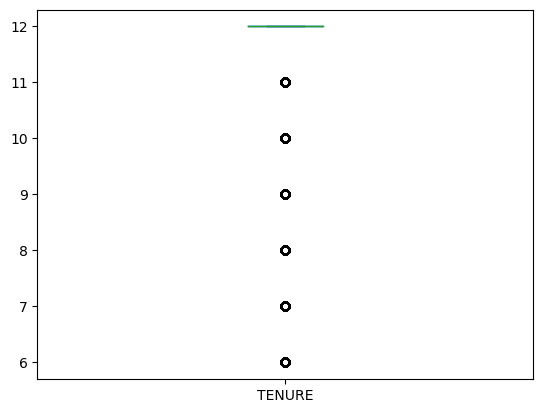

In [12]:
for col in data:
    if data[col].dtype== object :
        continue
    else :
        
    
        
    
         data[col].plot(kind='box')
         plt.show()
    

In [13]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


<AxesSubplot:>

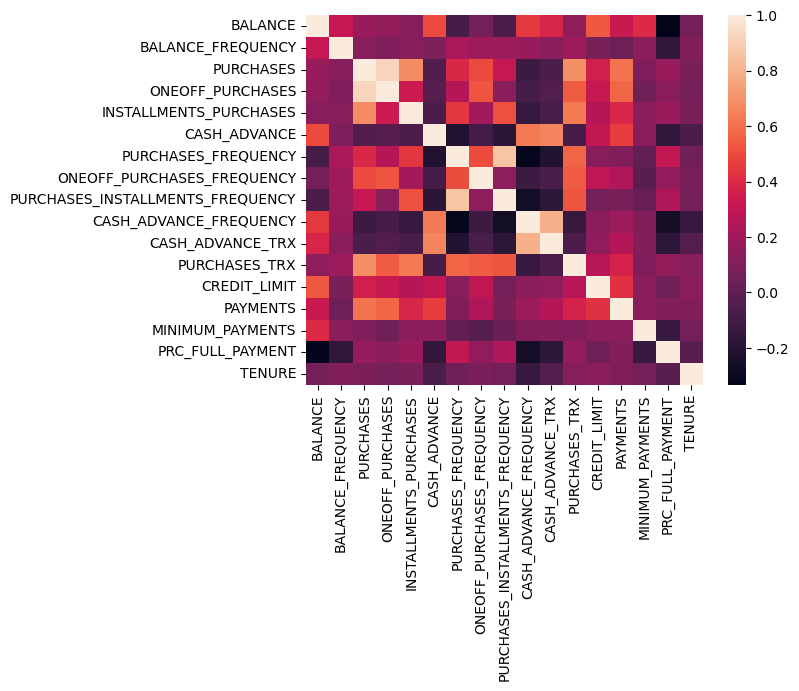

In [14]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix)

In [5]:
#Removing outliers
cols=['CASH_ADVANCE','CREDIT_LIMIT','BALANCE','PAYMENTS']
Q1=data[cols].quantile(0.25)
Q3=data[cols].quantile(0.75)
IQR=Q3-Q1
data=data[~((data[cols]<(Q1-1.5*IQR))|(data[cols]>(Q3+1.5*IQR))).any(axis=1)]

In [6]:
# Multicollinearity detection
from statsmodels.stats.outliers_influence import variance_inflation_factor


variables = data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [7]:
vif

,VIF,features
0,3.538520,BALANCE
1,22.276987,BALANCE_FREQUENCY
2,21634.074093,PURCHASES
3,10113.074323,ONEOFF_PURCHASES
4,5921.956929,INSTALLMENTS_PURCHASES
5,2.952025,CASH_ADVANCE
6,29.922750,PURCHASES_FREQUENCY
7,6.623432,ONEOFF_PURCHASES_FREQUENCY
8,21.021576,PURCHASES_INSTALLMENTS_FREQUENCY
9,6.279918,CASH_ADVANCE_FREQUENCY


In [8]:
#dropping variables that have vif more than 10 
data=data.drop(['BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','TENURE'],axis=1)

In [9]:
data

,BALANCE,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
CUST_ID,,,,,,,,,,
C10001,40.900749,0.000000,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.00
C10003,2495.148862,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00
C10005,817.714335,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.00
C10006,1809.828751,0.000000,0.000000,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00
C10008,1823.652743,0.000000,0.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00
...,...,...,...,...,...,...,...,...,...,...
C19184,5.871712,0.000000,0.166667,0.000000,0,1,500.0,58.644883,43.473717,0.00
C19186,28.493517,0.000000,0.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.50
C19188,23.398673,0.000000,0.000000,0.000000,0,5,1000.0,81.270775,82.418369,0.25


As the scope of data is different and there are outliers we should standardize data 

In [10]:
scaler = StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)

In [11]:
data_scaled

array([[-8.51299285e-01, -5.69950112e-01, -6.61923530e-01, ...,
        -8.87879560e-01, -2.61942933e-01, -5.51952695e-01],
       [ 1.38141649e+00, -5.69950112e-01,  2.86494944e+00, ...,
        -4.20586148e-01,  4.26381188e-04, -5.51952695e-01],
       [-1.44604660e-01, -5.69950112e-01, -3.68018625e-01, ...,
        -3.58021583e-01, -2.05313090e-01, -5.51952695e-01],
       ...,
       [-8.67221539e-01, -5.69950112e-01, -6.61923530e-01, ...,
        -1.02189865e+00, -2.92651838e-01,  2.78717164e-01],
       [-8.76265315e-01, -5.15078690e-01, -6.61923530e-01, ...,
        -1.05383340e+00, -3.06993461e-01,  2.78717164e-01],
       [-5.49442497e-01, -3.79274539e-01,  1.68932629e+00, ...,
        -1.04203006e+00, -2.89494108e-01, -5.51952695e-01]])

In [12]:
data_scaled.shape

(6861, 10)

In [14]:
def reduce_dimensions_by_pca(df):
    # we do it as we still have a lot of variables 

    # 0.95 means that we will save 95% useful information
    
    pca = PCA(n_components=0.95)
    numpy_arr = pca.fit_transform(df)
   
    return(numpy_arr)

In [15]:
cleaned_data=reduce_dimensions_by_pca(data_scaled)

C:\Users\Elnour Tech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

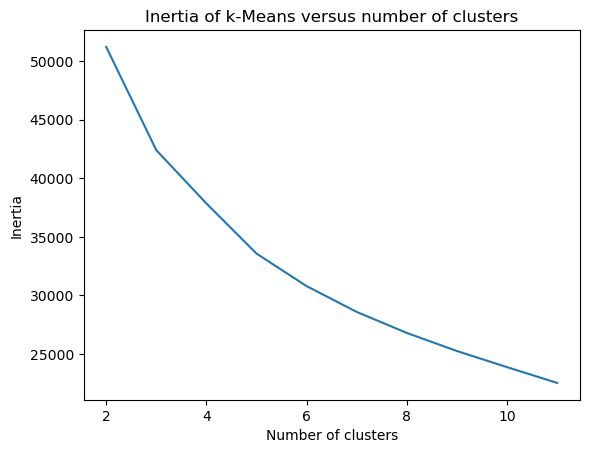

In [17]:
scores = [KMeans(n_clusters=i+2).fit(cleaned_data).inertia_ for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [18]:
 kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,}

In [19]:
silhouette_coefficients = []
   
    
for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(cleaned_data)
        score = silhouette_score(cleaned_data, kmeans.labels_)
        silhouette_coefficients.append(score)

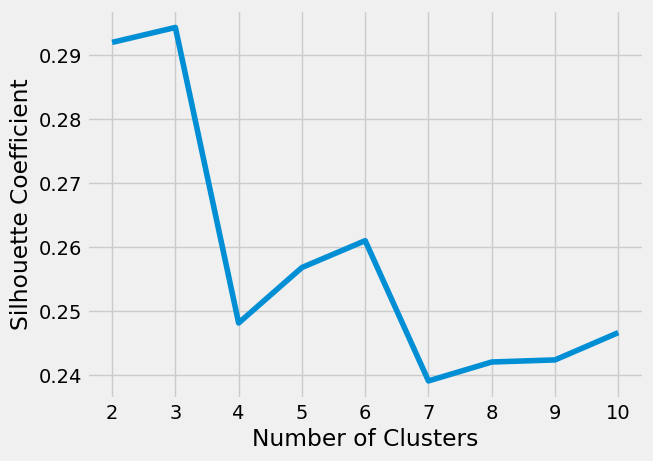

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##Its looks like that 3 clusters is the best number of clusters as it has the best inertia and silhouette score

In [21]:
kmeans=KMeans(n_clusters=3)
predicted_labels=kmeans.fit_predict(cleaned_data)

In [22]:
predicted_labels

array([1, 2, 1, ..., 1, 1, 1])

In [23]:
clusters=unique(predicted_labels)

In [24]:
clusters

array([0, 1, 2])

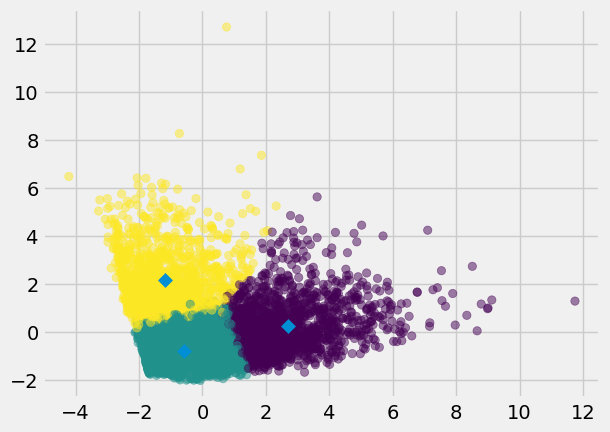

In [25]:
xs=cleaned_data[:,0]
ys=cleaned_data[:,1]
plt.scatter(xs,ys,c=predicted_labels,alpha=0.5)
centroids=kmeans.cluster_centers_
centroids_x=centroids[:,0]
centroids_y=centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

Using DBSCAN algorithm

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter

Lets use NearestNeighbors to find the optimal eps value

In [52]:
nn = NearestNeighbors(n_neighbors=20).fit(cleaned_data)
distances, indices = nn.kneighbors(cleaned_data)

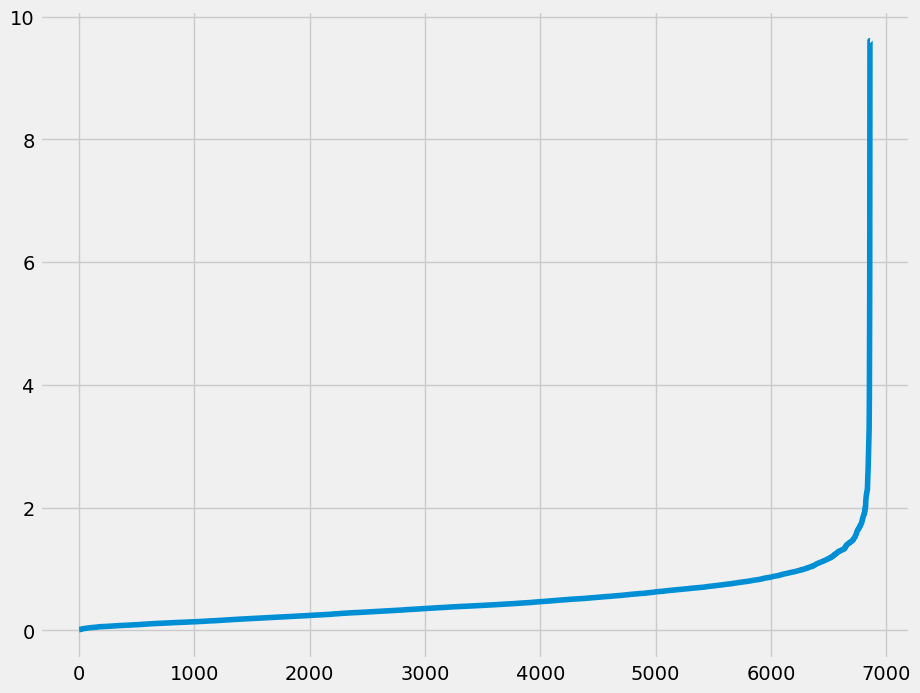

In [53]:
#elbow point will give us the samller range for optimal eps value.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [54]:
min_samples = range(10,21)
eps = np.arange(0.5,2)

In [55]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(cleaned_data).labels_
        score = silhouette_score(cleaned_data, labels)
        output.append((ms, ep, score))

In [56]:
#Get the parameters for best silhouette score
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.4616212304342914
min_samples: 10
eps: 1.5


In [57]:
#Get the number of clusters and outliers for DBSCAN with best parameters
labels = DBSCAN(min_samples=min_samples, eps = 1.5).fit(cleaned_data).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(cleaned_data, labels)}")

Number of clusters: 2
Number of outliers: 325
Silhouette_score: 0.4616212304342914


Text(0.5, 1.0, 'DBSCAN')

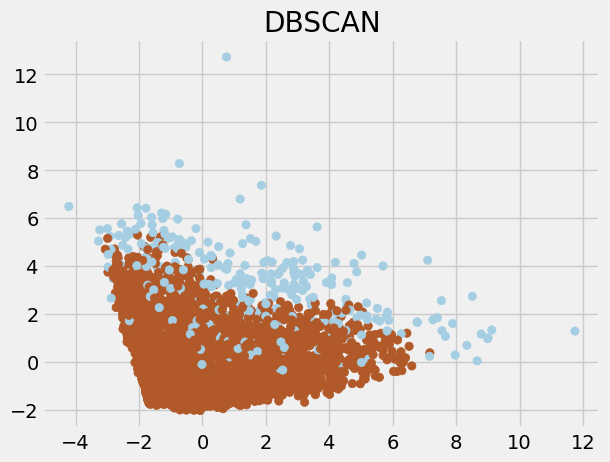

In [58]:
db = DBSCAN(eps=1.5, min_samples=10)
db.fit(cleaned_data)
y_pred = db.fit_predict(cleaned_data)
plt.scatter(cleaned_data[:,0], cleaned_data[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")